In [969]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy.typing as npt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import xgboost as xgb

# Constantes

blablabla

In [970]:
RANDOM_STATE: np.int8 = 17
TEST_SIZE: np.float64 = 0.2

MAXIMUM_UNIT_LENGTH_STAY: np.int32 = 24
NUMBER_OF_BINS: np.int8 = 2

# Base de dados

In [971]:
# getting data from comorbidades and capacidade funcional, plus ages and labels
df: pd.DataFrame = pd.read_csv("data/raw/folha3.csv")
ages: pd.Series = df["Age"].copy()
df: pd.DataFrame = df[df["UnitLengthStay"].apply(lambda x: x <= MAXIMUM_UNIT_LENGTH_STAY)].copy()
df.dropna(axis=1, thresh=5000, inplace=True)
df.fillna(value=0, inplace=True)
labels: pd.DataFrame = df["UnitLengthStay"].copy()
df = df.iloc[:, 22:]
sheet_3_df: pd.DataFrame = (df == "Verdadeiro").astype(int)

# getting data from motivos de internação na UTI
df = pd.read_csv("data/raw/folha4.csv")
df: pd.DataFrame = df[df["UnitLengthStay"].apply(lambda x: x <= MAXIMUM_UNIT_LENGTH_STAY)].copy()
df = df.iloc[:, 21:]
df.dropna(axis=1, thresh=5000, inplace=True)
df.fillna(value=0, inplace=True)
sheet_4_df: pd.DataFrame = (df == "Verdadeiro").astype(int)

# getting data from dados fisiologicos na UTI
df = pd.read_csv("data/raw/folha6.csv")
df: pd.DataFrame = df[df["UnitLengthStay"].apply(lambda x: x <= MAXIMUM_UNIT_LENGTH_STAY)].copy()
df = df.iloc[:, 21:]
df.dropna(axis=1, thresh=5000, inplace=True)
df.fillna(value=0, inplace=True)
sheet_6_df: pd.DataFrame = df.copy()

# joining dataframes
final_data: pd.DataFrame = pd.concat([ages, sheet_3_df, sheet_4_df, sheet_6_df], axis=1, join="inner")

labels_regression: pd.DataFrame = labels.copy()
labels_classification: pd.DataFrame = pd.cut(x=labels_regression, bins=[0, 2, MAXIMUM_UNIT_LENGTH_STAY], labels=np.arange(NUMBER_OF_BINS))

# Utilitários

In [ ]:
def get_run_info(
    y_true: npt.NDArray[np.float64],
    y_pred: npt.NDArray[np.float64],
    type: np.str_ = "classification",
    dump: np.bool_ = False,
) -> dict:
    accuracy_score = 5

    run_info: dict = {"accuracy_score": accuracy_score}
    return run_info

# REGRESSION

In [972]:
X_train, X_test, y_train, y_test = train_test_split(
    final_data, labels_regression, test_size=TEST_SIZE, random_state=RANDOM_STATE
)
NUMBER_OF_ESTIMATORS: np.int32 = 400

In [973]:
model = RandomForestRegressor(n_estimators=NUMBER_OF_ESTIMATORS)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

10.950829048490302

In [974]:
model = xgb.XGBRegressor(n_estimators=NUMBER_OF_ESTIMATORS)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

12.142385358124207

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

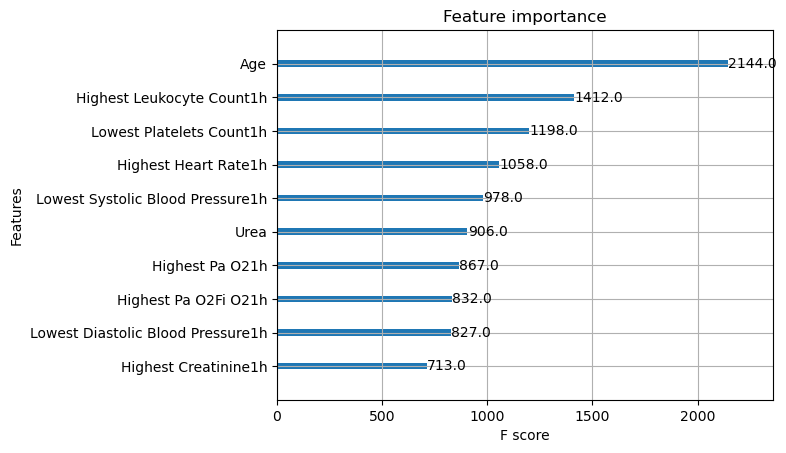

In [975]:
xgb.plot_importance(booster=model, max_num_features=10)

# CLASSIFICATION

In [976]:
X_train, X_test, y_train, y_test = train_test_split(
    final_data, labels_classification, test_size=TEST_SIZE, random_state=RANDOM_STATE
)
NUMBER_OF_ESTIMATORS: np.int32 = 400

In [977]:
model = xgb.XGBClassifier(n_estimators=NUMBER_OF_ESTIMATORS, random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.5867768595041322

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

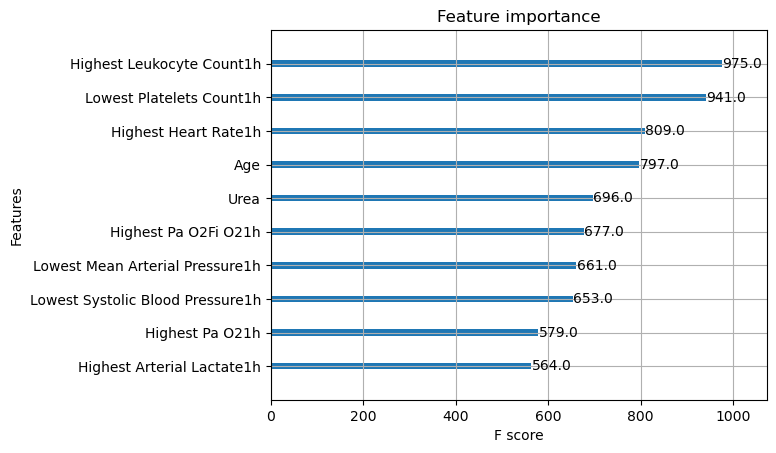

In [978]:
xgb.plot_importance(booster=model, max_num_features=10)